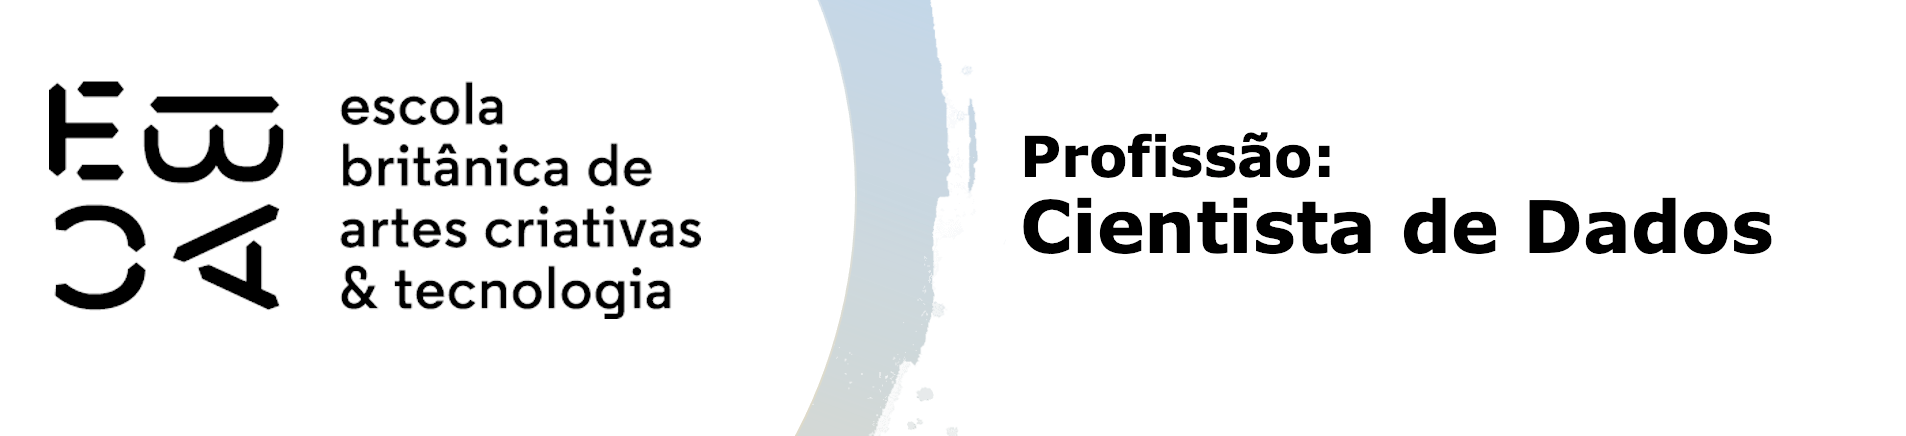

# Métodos hierárquicos de agrupamento - Tarefa

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [70]:
peng = sns.load_dataset('penguins')
peng.index.name = 'id'
peng_num = peng.select_dtypes('number').dropna()
peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
id,,,,
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [72]:
peng_pad = StandardScaler().fit_transform(peng_num)

In [74]:
clust = AgglomerativeClustering(linkage='complete', distance_threshold=None, n_clusters=3)
clust.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [76]:
peng_num['grupo'] = clust.labels_
peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1


In [78]:
peng = peng.merge(peng_num['grupo'], how='left', on='id')

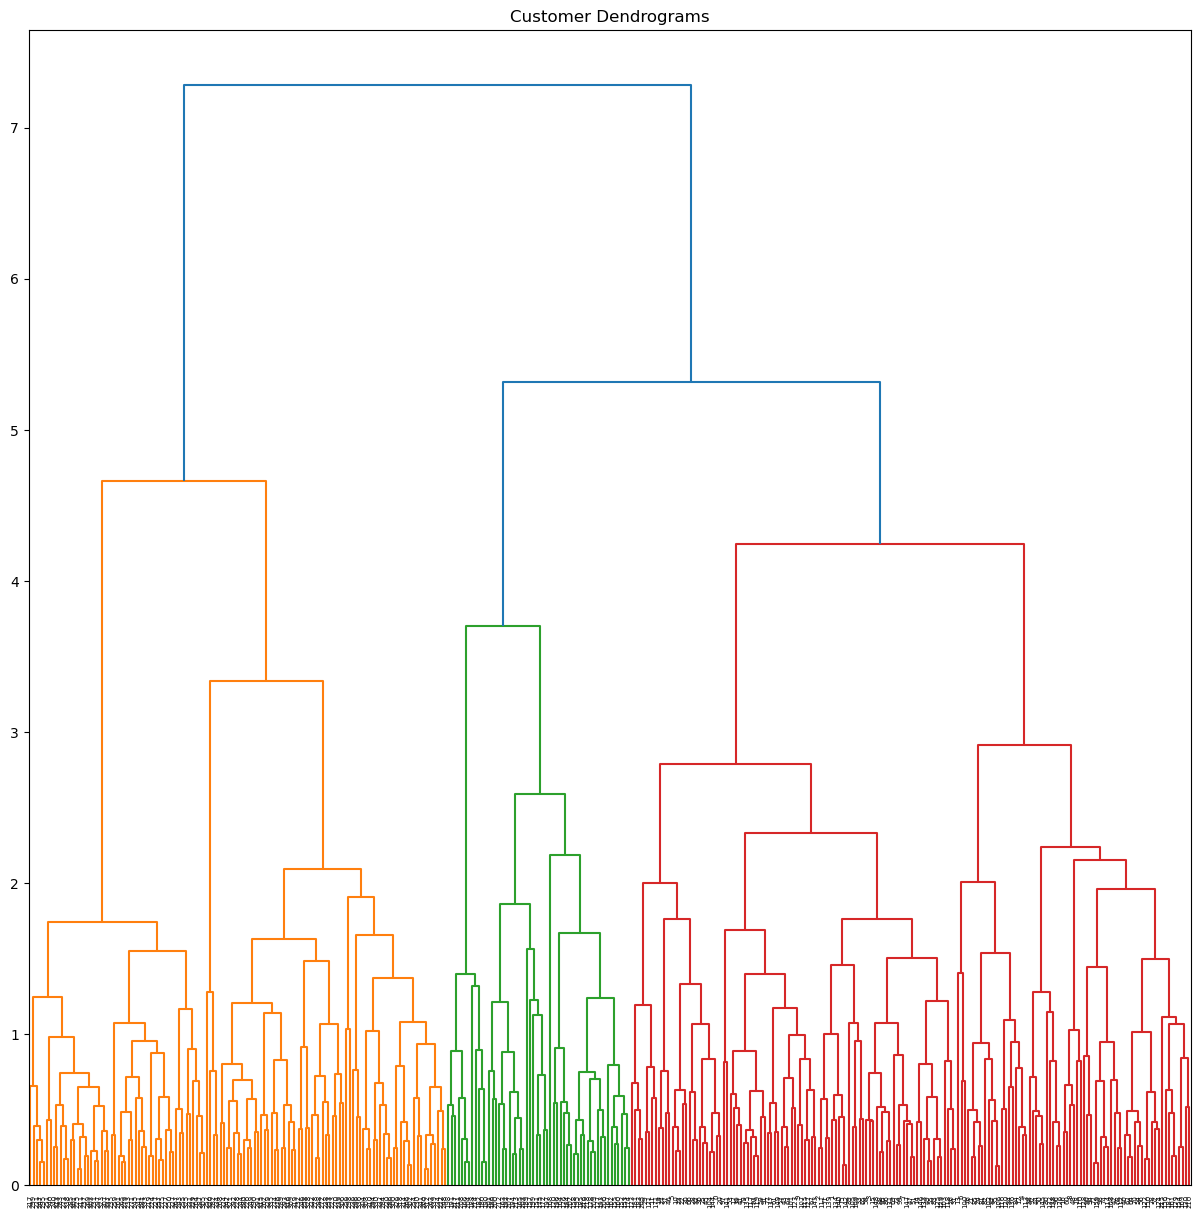

In [80]:
plt.figure(figsize=(15, 15))
plt.title('Customer Dendrograms')
dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [83]:
pd.crosstab(peng['species'], peng['grupo'])

grupo,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [91]:
clust = AgglomerativeClustering(linkage='complete', distance_threshold=None, n_clusters=5)
clust.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [93]:
peng_num['grupo'] = clust.labels_
peng_num.grupo.value_counts()

grupo
4    96
1    71
2    69
0    54
3    52
Name: count, dtype: int64

In [105]:
peng = peng.merge(peng_num['grupo'], how='left', on='id')

In [107]:
pd.crosstab(peng['species'], peng['grupo'])

grupo,0.0,1.0,2.0,3.0,4.0
species,,,,,
Adelie,0,0,60,0,91
Chinstrap,54,0,9,0,5
Gentoo,0,71,0,52,0


Capturou sim, conseguiu de forma uniforme distribuir e mais dois grupos duas das especies de pinguins.